# Hands-On Machine Learning Project
## Topic 20: Credit Data
### Florian Korn, Vincent Bläske, Dennis Götz

## I. Get the Data
1. Get (download) the data.
2. Convert the data to a format you can easily manipulate (without changing the data itself), e.g. a Pandas
DataFrame.
3. Sample a test set, put it aside, and never look at it (no data snooping!)

In [1]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set working directory
%cd "C:\Users\Dennis\OneDrive\Dokumente\03_Master BAOR\05_Kurse\07_Zusätzliche Leistungen\03_Hands-on Machine Learning\04_Credit Data"

# Column names
columns = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 
           'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property',
           'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job',
           'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Credit rating']

# Load original dataset DATA-Format
data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = columns

# Load numerical dataset CSV-Format
data_num = pd.read_csv('german.data-numeric.csv', sep=';', header=None)

data.head()

C:\Users\Dennis\OneDrive\Dokumente\03_Master BAOR\05_Kurse\07_Zusätzliche Leistungen\03_Hands-on Machine Learning\04_Credit Data


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Create dictionary with real values to make the DataFrame readable
categorical_dict = {# Attribute 1: (qualitative) Status of existing checking account 
                    'A11' : '... < 0 DM',
                    'A12' : '0 <= ... < 200 DM',
                    'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                    'A14' : 'no checking account',

                    # Attribute 3: (qualitative) Credit history 
                    'A30' : 'no credits taken/ all credits paid back duly',
                    'A31' : 'all credits at this bank paid back duly',
                    'A32' : 'existing credits paid back duly till now',
                    'A33' : 'delay in paying off in the past',
                    'A34' : 'critical account/ other credits existing (not at this bank)',
                    
                    # Attribute 4: (qualitative) Purpose 
                    'A40' : 'car (new)',
                    'A41' : 'car (used)',
                    'A42' : 'furniture/equipment',
                    'A43' : 'radio/television',
                    'A44' : 'domestic appliances',
                    'A45' : 'repairs',
                    'A46' : 'education',
                    'A47' : '(vacation - does not exist?)',
                    'A48' : 'retraining',
                    'A49' : 'business',
                    'A410' : 'others',

                    # Attibute 6: (qualitative) Savings account/bonds 
                    'A61' : '... < 100 DM',
                    'A62' : '100 <= ... < 500 DM',
                    'A63' : '500 <= ... < 1000 DM',
                    'A64' : '... >= 1000 DM',
                    'A65' : 'unknown/ no savings account',

                    # Attribute 7: (qualitative) Present employment since 
                    'A71' : 'unemployed',
                    'A72' : '... < 1 year',
                    'A73' : '1 <= ... < 4 years',
                    'A74' : '4 <= ... < 7 years',
                    'A75' : '... >= 7 years',

                    # Attribute 9: (qualitative) Personal status and sex 
                    'A91' : 'male : divorced/separated',
                    'A92' : 'female : divorced/separated/married',
                    'A93' : 'male : single',
                    'A94' : 'male : married/widowed',
                    'A95' : 'female : single',

                    # Attribute 10: (qualitative) Other debtors / guarantors 
                    'A101' : 'none',
                    'A102' : 'co-applicant',
                    'A103' : 'guarantor',

                    # Attribute 12: (qualitative) Property 
                    'A121' : 'real estate',
                    'A122' : 'if not A121 : building society savings agreement/ life insurance',
                    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
                    'A124' : 'unknown / no property',

                    # Attribute 14: (qualitative) Other installment plans 
                    'A141' : 'bank',
                    'A142' : 'stores',
                    'A143' : 'none',

                    # Attribute 15: (qualitative) Housing 
                    'A151' : 'rent',
                    'A152' : 'own',
                    'A153' : 'for free',

                    # Attribute 17: (qualitative) Job
                    'A171' : 'unemployed/ unskilled - non-resident',
                    'A172' : 'unskilled - resident',
                    'A173' : 'skilled employee / official',
                    'A174' : 'management/ self-employed/ highly qualified employee/ officer',

                    # Attribute 19: (qualitative) Telephone
                    'A191' : 'none',
                    'A192' : 'yes, registered under the customers name',

                    # Attribute 20: (qualitative) foreign worker 
                    'A201' : 'yes',
                    'A202' : 'no',

                    # Target value: (qualitative) Credit rating
                    1 : 'good',
                    2 : 'bad'
                    }

In [4]:
# Qualitative columns
qualitative_cols = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                    'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property',
                    'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', 'Credit rating']

# Numerical columns
numerical_cols = list(set(columns) - set(qualitative_cols))

# Copy the data to a new DataFrame
data_values = data.copy()

# Apply the dictionary to all qualitative columns of the new DataFrame to get the real values
data_values[qualitative_cols] = pd.DataFrame([data_values[column].apply(lambda key: categorical_dict[key]) for column in qualitative_cols]).T

# Save new DataFrame as XLSX
data_values.to_excel('data_values.xlsx')
data_values.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


In [5]:
# Check for NA-values
print('NA values: {}\n'.format(np.sum(np.sum(data.isna()))))

#data_values.info()

# Check rate of target values
data_values['Credit rating'].value_counts() #slightly imbalanced; most of samples have a 'good' or '1' credit rating!

NA values: 0



good    700
bad     300
Name: Credit rating, dtype: int64

In [12]:
# Separate features and target values
features = np.array(data.iloc[:, :20])
target_values = np.array(data.iloc[:, -1])

# Split the dataset into training- and testset (goog/bad ratio stays the same)
X_train, X_test, y_train, y_test = train_test_split(features, target_values, train_size=0.8, random_state=0, stratify=target_values)

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value 1 in y_train: {:.2f} %'.format(100*np.sum(y_train == 1)/len(y_train)))
print('Ratio of target value 1 in y_test: {:.2f} %'.format(100*np.sum(y_test == 1)/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value 1 in y_train: 70.00 %
Ratio of target value 1 in y_test: 70.00 %


In [316]:
# Create DataFrame with X_train and y_train
data_train = pd.merge(left=pd.DataFrame(X_train), right=pd.DataFrame(y_train), left_index=True, right_index=True, )
data_train.columns = columns

# Change dtype() of numerical columns from 'object' to 'int64'
data_train[numerical_cols] = data_train[numerical_cols].astype('int64')
data_train[qualitative_cols] = data_train[qualitative_cols].astype('category')
#data_train.info()

# Get some statistics
data_train.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,20.74375,3240.373750,2.996250,2.86000,35.907500,1.407500,1.151250
std,12.05694,2831.611332,1.111432,1.09059,11.620036,0.569517,0.358517
min,4.00000,250.000000,1.000000,1.00000,19.000000,1.000000,1.000000
25%,12.00000,1344.000000,2.000000,2.00000,27.000000,1.000000,1.000000
50%,18.00000,2281.500000,3.000000,3.00000,33.500000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.00000,42.000000,2.000000,1.000000
max,72.00000,18424.000000,4.000000,4.00000,75.000000,4.000000,2.000000


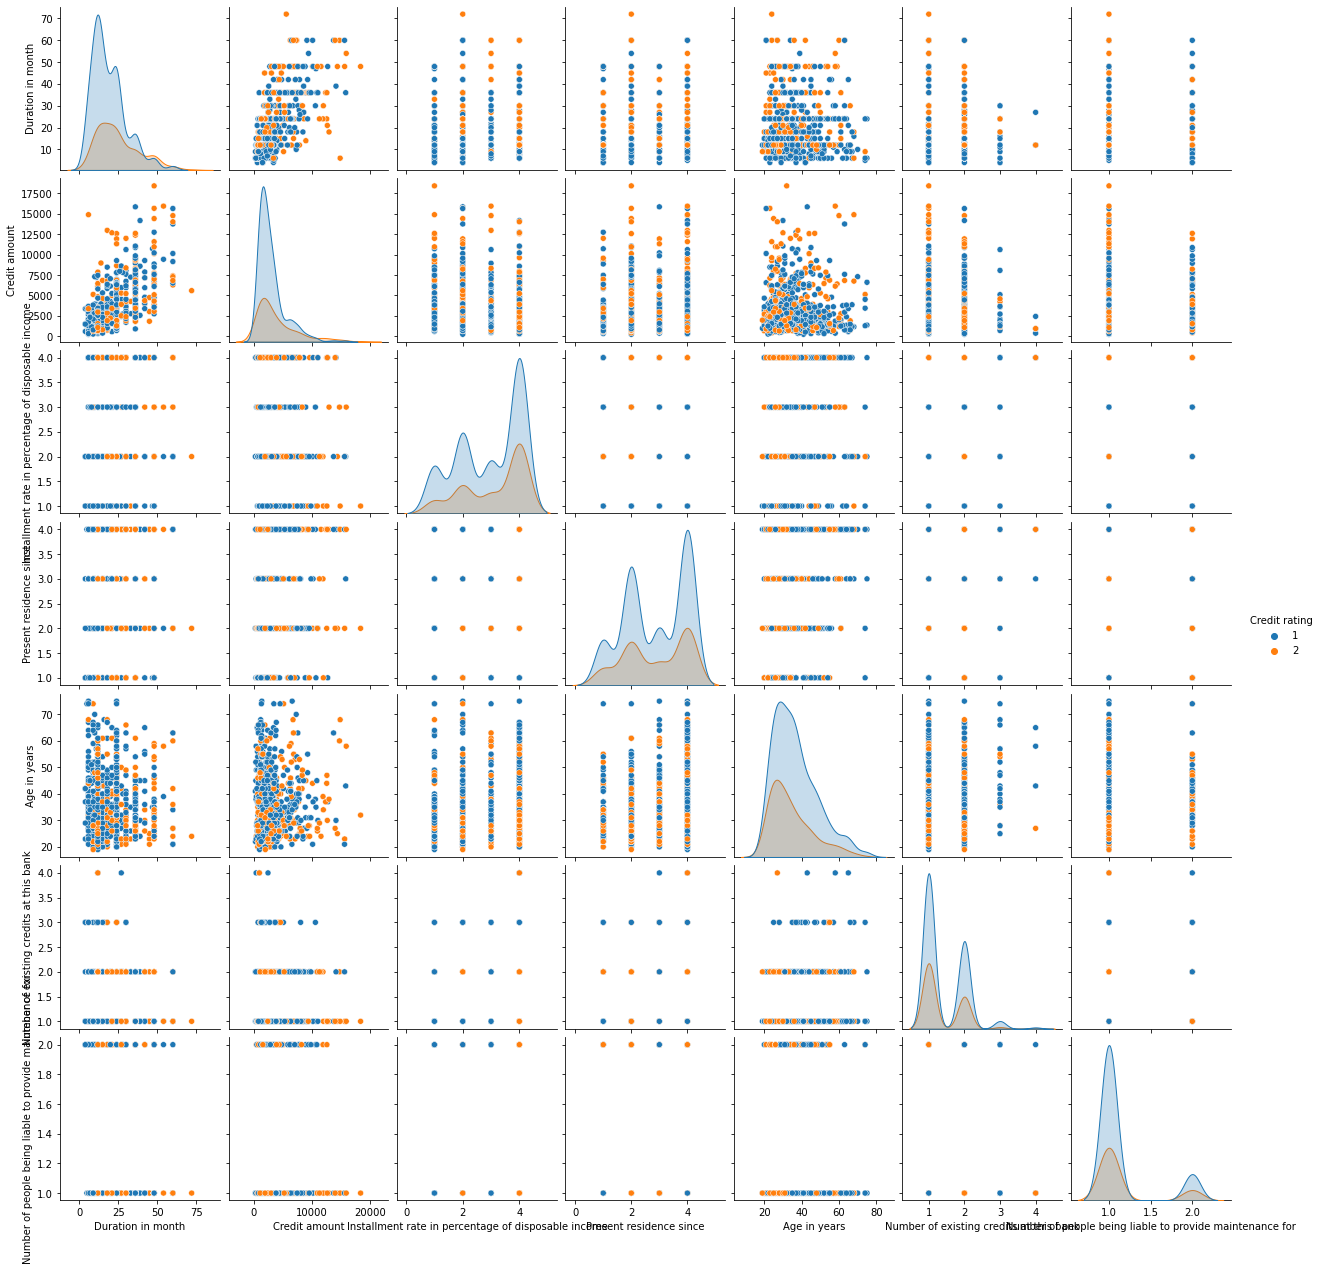

In [326]:
# Pairplotting the numerical columns
# scatter_matrix(data_train, c=y_train, figsize=(30,30), marker='o',
#                hist_kwds={'bins': 15}, s=30);

sns.pairplot(data_train, markers='o', hue='Credit rating');

In [312]:
# Correlation between features and target value
data_train.corr()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
Duration in month,1.000000,0.631447,0.064559,0.047905,-0.043469,-0.004823,-0.012738
Credit amount,0.631447,1.000000,-0.267262,0.017926,0.020044,0.014320,0.011634
Installment rate in percentage of disposable income,0.064559,-0.267262,1.000000,0.080105,0.064611,0.016258,-0.067676
Present residence since,0.047905,0.017926,0.080105,1.000000,0.253187,0.071816,0.028617
Age in years,-0.043469,0.020044,0.064611,0.253187,1.000000,0.147544,0.104005
Number of existing credits at this bank,-0.004823,0.014320,0.016258,0.071816,0.147544,1.000000,0.096190
Number of people being liable to provide maintenance for,-0.012738,0.011634,-0.067676,0.028617,0.104005,0.096190,1.000000


## II. Frame the Problem and Look at the Big Picture
1. Define the objective:<br>
a) Create a model that predicts the target value if a new sample has a 'good' or 'bad' credit rating.<br>
b) Most important features for credit rating? Reliability.<br>
c) Can a SMOTE algorithm improve the performance of the model (balanced dataset)?<br>
d) Can forward/backward selection improve the performance of the model?<br>

2. How should you frame this problem (supervised/unsupervised, regression/classification, etc)<br>
supervised, classification problem
3. How should performance be measured?<br>
Accuracy, AUC, ROC, F1-Score, GMean, Precision, Recall<br>
It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). (FP worse than FN!!)<br>
4. What would be the minimum performance needed to reach the objective?<br>
At least 70% accuracy.
5. How would you solve the problem manually?

## III. Explore the Data
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Recommended: Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:<br>
◦ Name<br>
◦ Type (categorical, int/float, bounded/unbounded, text, etc.)<br>
◦ % of missing values<br>
◦ Noisiness and type of noise (e.g. stochastic, outliers, rounding errors, etc.)<br>
◦ Usefulness for the task<br>
◦ Type of distribution (Gaussian, uniform, logarithmic, etc.) [Feel free to omit this for the projectsfor this lecture]
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes and in particular between the "feature attributes" and the target attribute.
7. Study how you would solve the problem manually.
8. Identify promising transformations (feature engineering) you may want to apply.
9. Document what you have learned